# Seaborn常用图像绘制
----

seaborn 会分组的 matplotlib

##### 使用sns.load_dataset() 加载数据集
```
searborn提供了很多实验数据集，查看数据集有哪些可以参考如下网址：
https://github.com/mwaskom/seaborn-data
```


In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import seaborn as sns

In [4]:
tips = sns.load_dataset('tips')

In [5]:
# 线型图

# 散点图

In [6]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### 一、普通2D图像

#### 通用参数：
```
x,y:  要展示的数据，如果是DataFrame，可以设置列标签
data:  数据的来源，通常是一个DataFrame
hue:  分组因子, 用于颜色映射的列
palette:  用于颜色映射的调色板
order:  排序的序列.例如 order = ['Dinner', 'Lunch']
hue_order: 颜色映射的序列， 例如hue_order = ["setosa","virginica"]

```

In [7]:
data = np.array([1,2,3,4])

<BarContainer object of 4 artists>

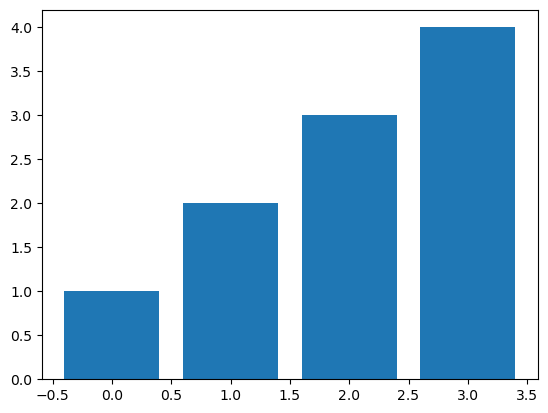

In [8]:
plt.bar(np.arange(4), data)

<Axes: >

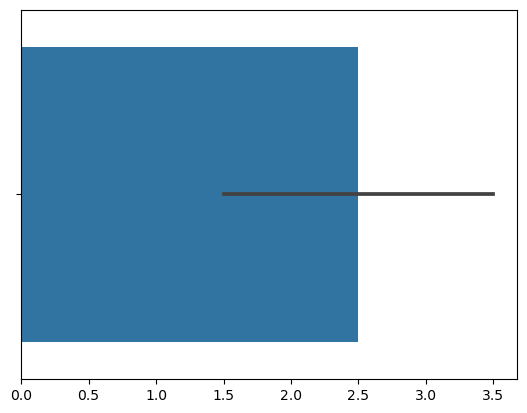

In [9]:
sns.barplot(x=data)

In [10]:
# 查看不同性别 消费总账单的平均值
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


C:\Users\23580\AppData\Local\Temp\ipykernel_35624\2914964078.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tips.groupby('sex').sum()["total_bill"].plot(kind="bar")


<Axes: xlabel='sex'>

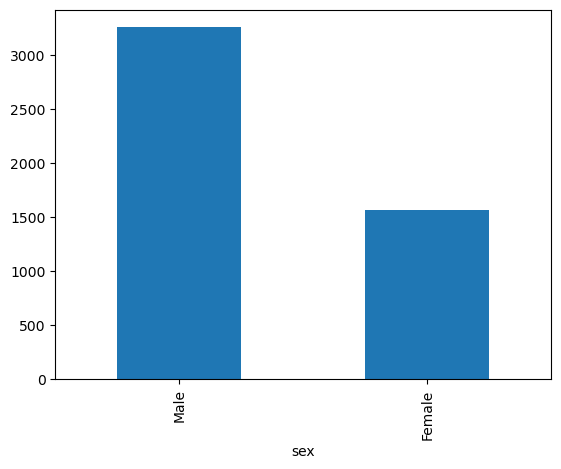

In [11]:
tips.groupby('sex').sum()["total_bill"].plot(kind="bar")

In [12]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [13]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
# 'sequential', 'diverging', 'qualitative'
colors = sns.choose_colorbrewer_palette('qualitative')

interactive(children=(Dropdown(description='name', options=('Set1', 'Set2', 'Set3', 'Paired', 'Accent', 'Paste…

<Axes: xlabel='sex', ylabel='total_bill'>

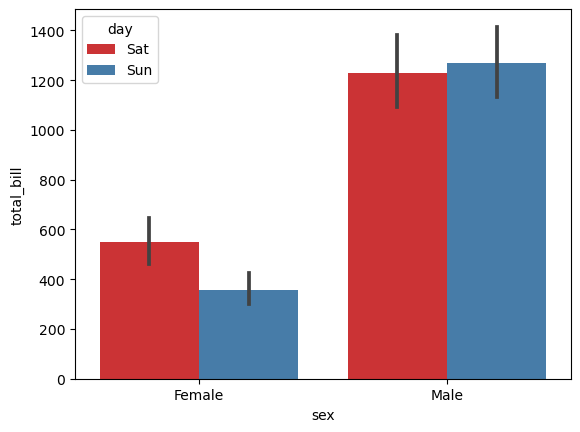

In [15]:
sns.barplot(y='total_bill',x='sex', hue='day', data=tips, ci=95, palette=colors, hue_order=["Sat","Sun"],order=["Female","Male"], 
            estimator=sum)

In [16]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [17]:
# 查看不同时间， 男女小费的平均值

In [18]:
sns.set()

<Axes: xlabel='time', ylabel='tip'>

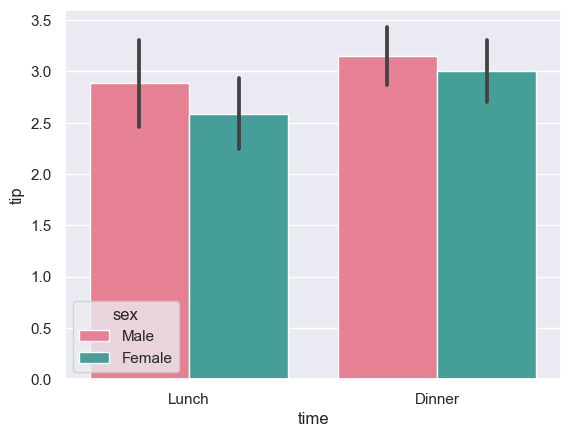

In [19]:
sns.barplot(y='tip', x='time', data=tips, hue='sex', palette='husl')

In [20]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


<Axes: xlabel='total_bill', ylabel='tip'>

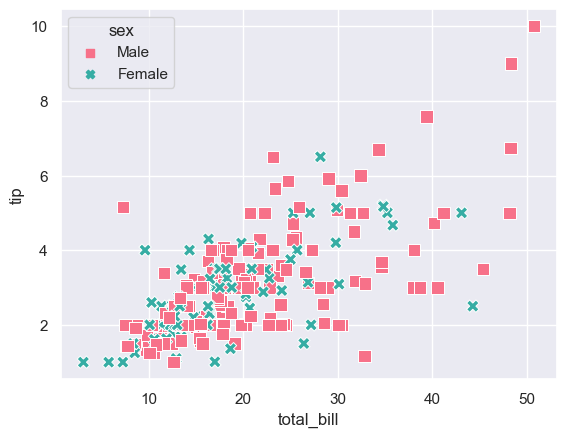

In [21]:
markers = {"Male":"s","Female":"X"}
# style + markers 设定点型
sns.scatterplot(x="total_bill", y="tip", data=tips, hue="sex", style='sex', palette='husl', s=80, markers=markers)

#### 条形图
```
比较多组数据之间的大小
sns.barplot()
```

参数说明：
```
estimator: 统计参数默认为 np.mean,可自定义： np.sum, np.count_nonzero, np.median...
palette: 主题的颜色 palette = 'Blues_d'
ci: 置信水平  http://www.360doc.com/content/18/0317/16/15033922_737796626.shtml
```

#### 计数条形图
```
统计数据出现次数
sns.countplot()

eg.按性别统计titanic号中幸存者数量
```

In [22]:
tips.sex.value_counts()

Male      157
Female     87
Name: sex, dtype: int64

<Axes: xlabel='count', ylabel='sex'>

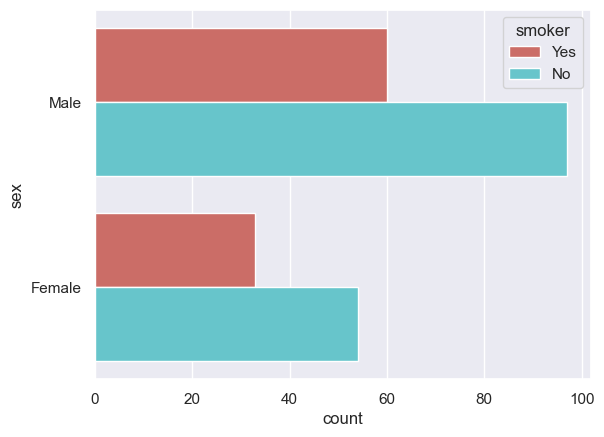

In [23]:
sns.countplot(y="sex", data=tips,hue="smoker", palette='hls')

#### 散点图

```
查看两组数据对应关系
sns.stripplot()
```

<Axes: xlabel='total_bill', ylabel='tip'>

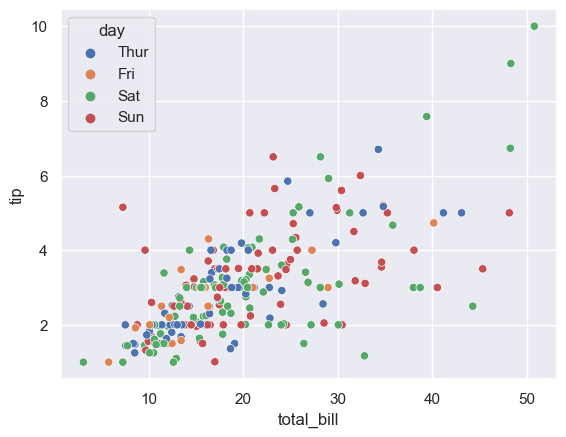

In [24]:
# 适合处理连续值与连续值的对应关系
sns.scatterplot(x="total_bill", y="tip", data=tips, hue="day")

<Axes: xlabel='sex', ylabel='tip'>

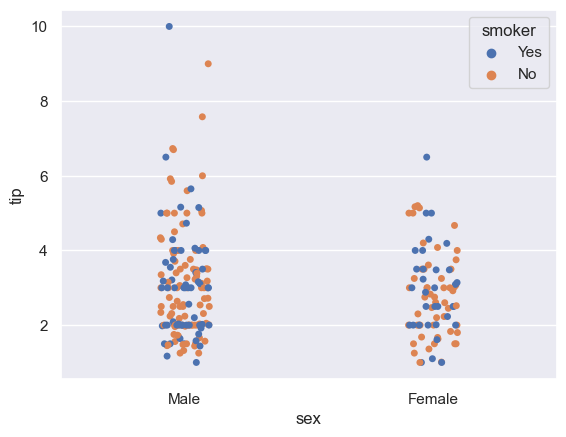

In [25]:
# 适合处理离散值与连续值的对电影关系
sns.stripplot(x='sex', y="tip", data=tips, hue="smoker")

#### 分簇散点图，与stipplot()的区别就是点不重叠

```
sns.swarmplot()
```

<Axes: xlabel='sex', ylabel='tip'>

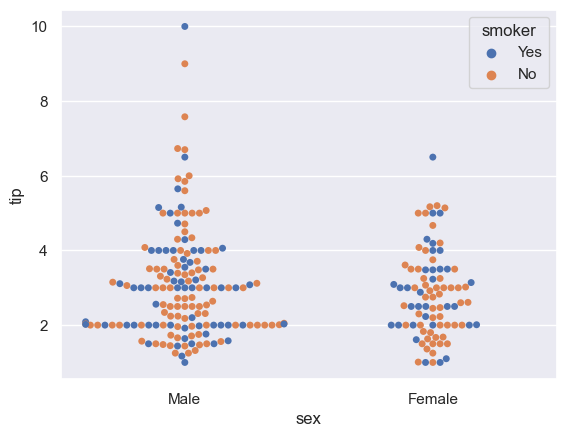

In [26]:
sns.swarmplot(x="sex", y="tip", data=tips, hue="smoker")

### 小提琴图
```
用于查看数据分布情况
sns.violinplot()
```

<Axes: xlabel='sex', ylabel='tip'>

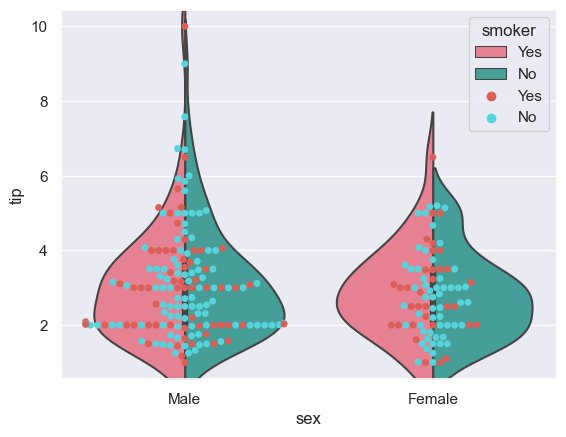

In [27]:
# 查看离散值和连续值的对应关系，可以看到离散值的数据分布状况
sns.violinplot(x="sex", y="tip", data=tips, hue="smoker", split=True, palette='husl', alpha=0.3)
sns.swarmplot(x="sex", y="tip", data=tips, hue="smoker", palette='hls')

#### 箱线图

```
检验连续数据是否存在离群点，以及数据分布的范围（4分位数）
sns.boxplot()
可以配合结合sns.swarmplot()函数使用
```
参数说明
```
y: 需要判断的数据序列（连续型数据）
x: 分类的标签的数据（离散型数据）
palette: 调色板...Set1, Set2, Set3
linwidth: 线宽(2.5相当于加粗的线)
orient = 'h' 方向
whis 参数设定是否显示箱线图的离群点， whis = np.inf 表示不显示
```

<Axes: xlabel='sex', ylabel='tip'>

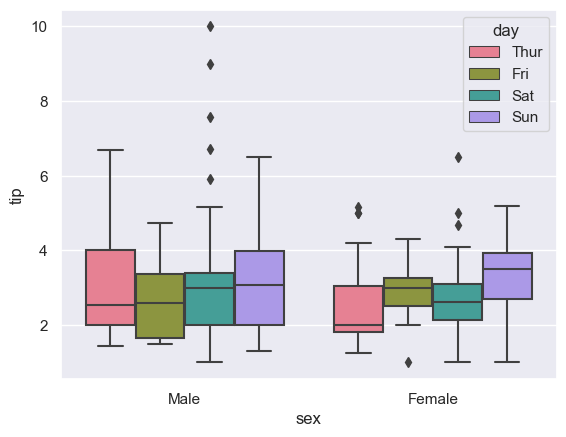

In [28]:
# 查看连续值的数据分布
sns.boxplot(y="tip", x="sex",hue='day', data=tips, palette='husl')

<Axes: xlabel='day', ylabel='total_bill'>

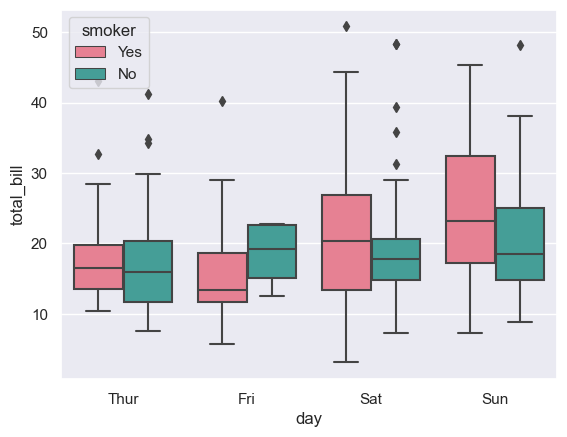

In [29]:
# 查看每一天，吸烟者和不吸烟者的消费总账单的数据分布
sns.boxplot(y="total_bill", x='day', hue='smoker', data=tips, palette='husl')

In [30]:
titanic = sns.load_dataset('titanic')

In [31]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [32]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='survived', ylabel='age'>

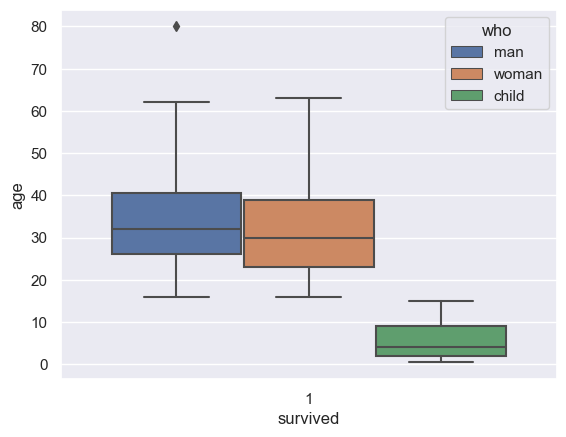

In [33]:
# 查看获救者的年龄分布
sns.boxplot(y="age", x="survived",hue="who", data=titanic, order=[1])

<Axes: xlabel='who', ylabel='count'>

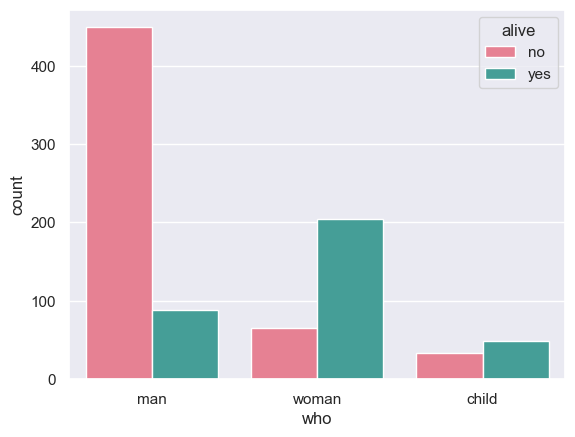

In [34]:
# 根据不同性别查看幸存者的比例

# 查看数量
sns.countplot(x="who", hue="alive",data=titanic, palette='husl')

In [35]:
titanic.alive.unique()

array(['no', 'yes'], dtype=object)

#### 热图
```
sns.heatmap(data=data, annot=True)
```
参数说明：
```
vmin颜色值映射的最小值
vmax颜色值映射的最大值
cbar：每个变量的颜色棒是否显示
annot = True 将数值显示到图上
```

In [37]:
#根据颜色来表示数据的大小关系 （-1，1）  0 

# 连续颜色：  小 ~~ 大
# 两极颜色：  着重表现两端

In [38]:
data = sns.load_dataset('iris').corr()

In [39]:
# 'sequential', 'diverging'
cmap = sns.choose_colorbrewer_palette(data_type='sequential', as_cmap=True)

interactive(children=(Dropdown(description='name', options=('Greys', 'Reds', 'Greens', 'Blues', 'Oranges', 'Pu…

<Axes: >

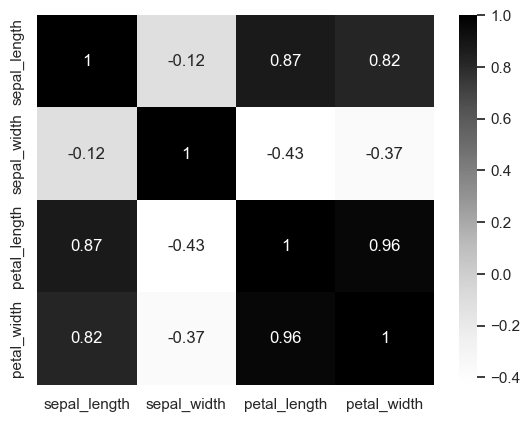

In [40]:
sns.heatmap(data=data, annot=True, cmap=cmap)

In [41]:
# 趋向于-1，1的值都要着重表现
data = np.random.random(size=(10,10))*2 - 1

In [42]:
cmap1 = sns.choose_colorbrewer_palette('diverging', as_cmap=True)

interactive(children=(Dropdown(description='name', options=('RdBu', 'RdGy', 'PRGn', 'PiYG', 'BrBG', 'RdYlBu', …

<Axes: >

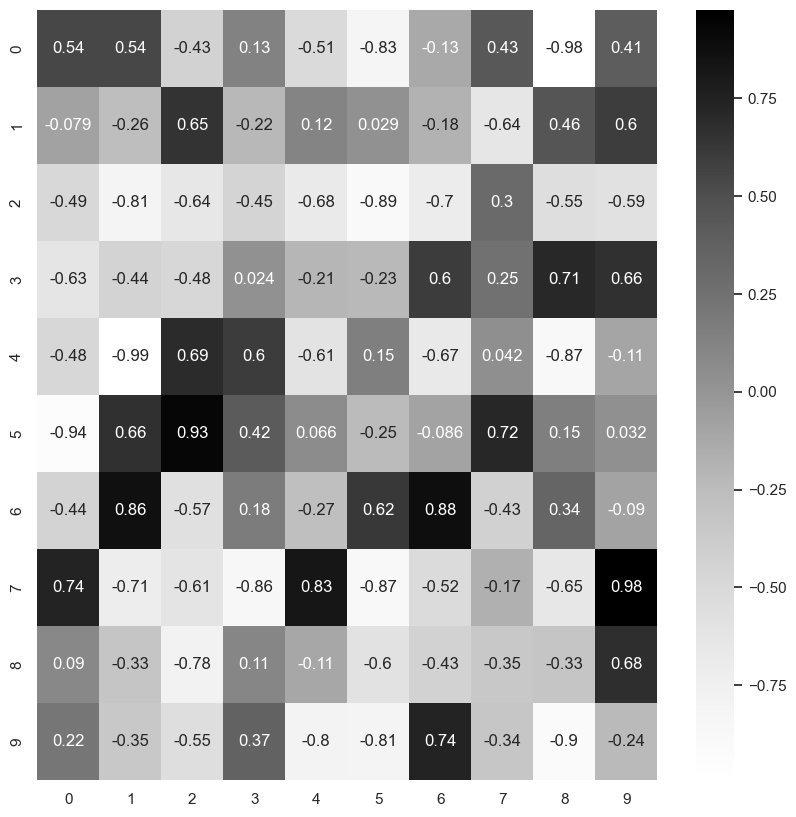

In [43]:
plt.figure(figsize=(10,10))
sns.heatmap(data, cmap=cmap, annot=True)

##### 扩展
df.corr() 计算两组数据的相关性
```
三个相关性系数（pearson, spearman, kendall）反应的都是两个变量之间变化趋势的方向以及程度，其值范围为-1到+1，0表示两个变量不相关，正值表示正相关，负值表示负相关，值越大表示相关性越强。
```

```
method : {'pearson', 'kendall', 'spearman'}
pearson : 当数据满足正态性时可用Pearson相关系数查看变量间关系情况
spearman : 当数据为定量数据，且不服从正态性则使用Spearman相关系数
kendall : Kendall相关系数通常用于评分数据一致性水平研究，比如评委打分，数据排名等。
```

### 二、高级函数
```针对数据可视化的不同目的，seaborn提供了**relplot()，catplot()，displot()，lmplot()**四大主要高级函数。

seaborn与pandas的DataFrame的结合非常好，因此传参是可以直接传入列名。
返回的是FacetGrid(平面网格图)对象。```

这些高级函数的主要参数如下：
```
- x，y：输入变量
- data：输入数据df
- hue：分组变量
- style：如传入，则hue分组后每组数据作图风格可不一致
- col，row：决定平面网格图布局的变量
- kind：底层作图类型名称，如"line",“bar”,"box"等
```

#### 可视化变量关系（relationship)

```
regplot() 方便观察变量间的关系， 默认是散点图
lmplot()  x和y必须以字符串的方式传入，比regplot更加严格
```
参数说明：
```
 x_jitter, y_jitter: 给离散型数据添加抖动（仅适用于离散型数据）,且不会影响拟合的回归线本身
 x_estimator: 当x轴为离散数据时，指定y轴上的数据的运算函数，np.mean、np.median...
 order: 如果数据的分布规律是非线性的，设置order>1的任意值，则使用多项式回归来绘制回归曲线
```

<Axes: xlabel='total_bill', ylabel='tip'>

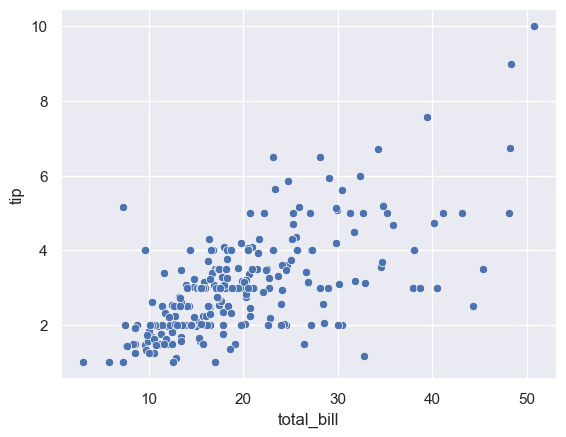

In [44]:
sns.scatterplot(y="tip", x="total_bill", data=tips)

<Axes: xlabel='total_bill', ylabel='tip'>

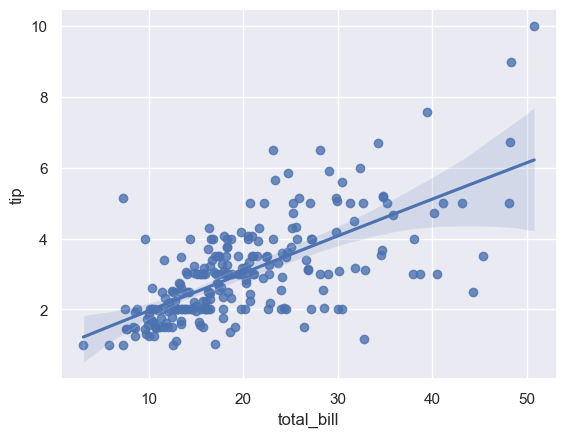

In [45]:
# 线性回归
sns.regplot(y="tip",x="total_bill", data=tips, order=2)

<Axes: xlabel='total_bill', ylabel='tip'>

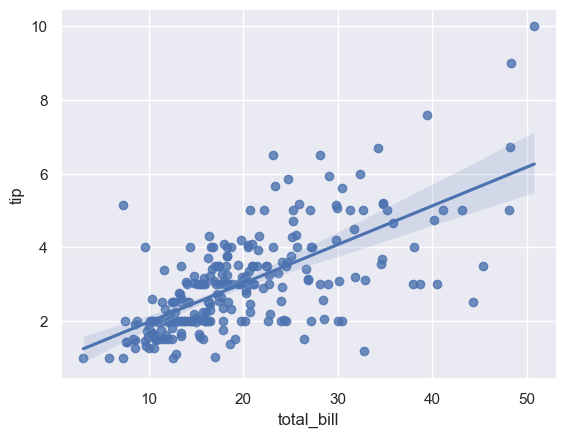

In [46]:
sns.regplot(x=tips.total_bill, y=tips.tip)

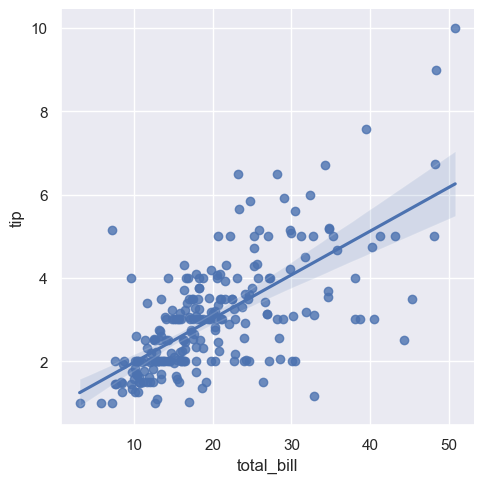

In [47]:
sns.lmplot(x="total_bill", y="tip", data=tips)

#### 数据集分布图(distribution)
```
特征工程前，需要对数据集的有一个整体的了解，seabon提供的高级函数displot()可以作各种分布图。
```

1.单变量分布 
```
distplot()
kdeplot()
rugplot()
```

参数说明：
```
bins: 数据分布区间个数
axlabel: 横轴标签
label: 图例标签
kde: 是否显示核密度估计，如果开启，则数据以归一化方式显示
rug: 是否显示地毯图
（kde、hist、sug）kws: 外观属性设置
norm_hist: 是否归一化处理，需要关闭kde显示

```

In [48]:
import numpy as np

In [49]:
colors = sns.color_palette("husl")

<Axes: xlabel='total_bill', ylabel='Density'>

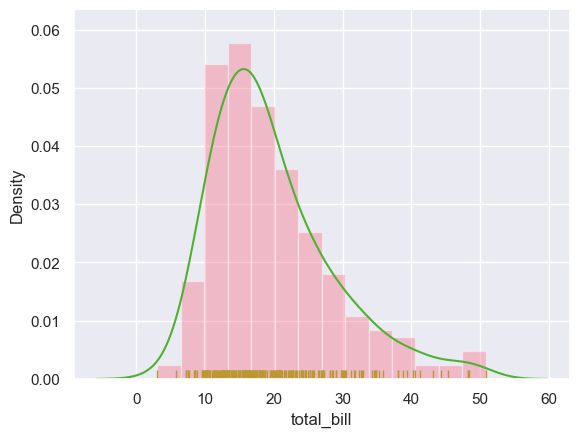

In [50]:
# 默认是核密度估计图
sns.distplot(a=tips.total_bill,hist=True, kde=True, rug=True, hist_kws={
    "color":colors[0],
}, rug_kws={
    "color":colors[1],
}, kde_kws={
    "color":colors[2]
})

<Axes: xlabel='total_bill'>

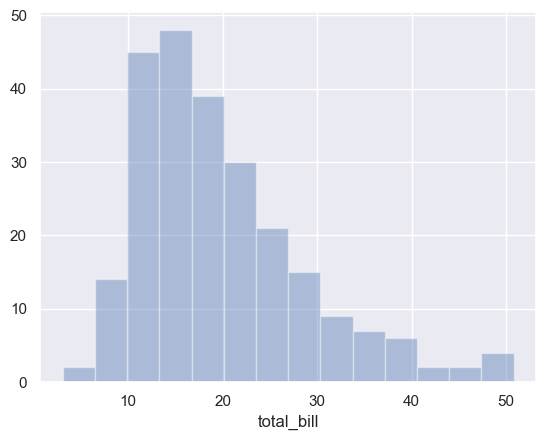

In [51]:
sns.distplot(a=tips.total_bill, norm_hist=False, kde=False)

<Axes: xlabel='total_bill'>

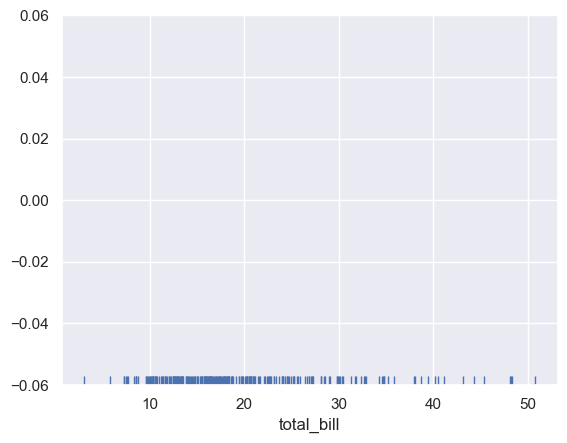

In [52]:
sns.distplot(a=tips.total_bill, hist=False, kde=False, rug=True)

<Axes: xlabel='total_bill', ylabel='Density'>

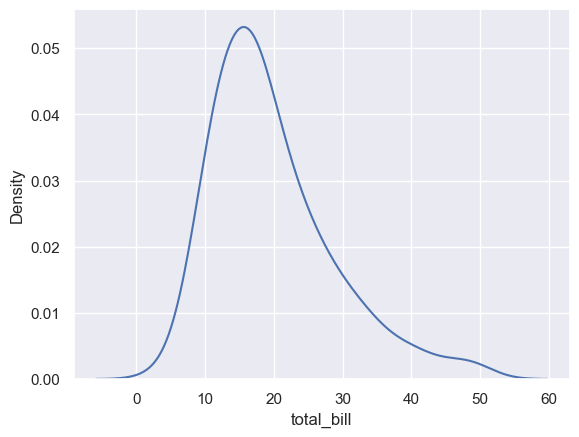

In [53]:
sns.kdeplot(data=tips.total_bill)

<Axes: xlabel='total_bill'>

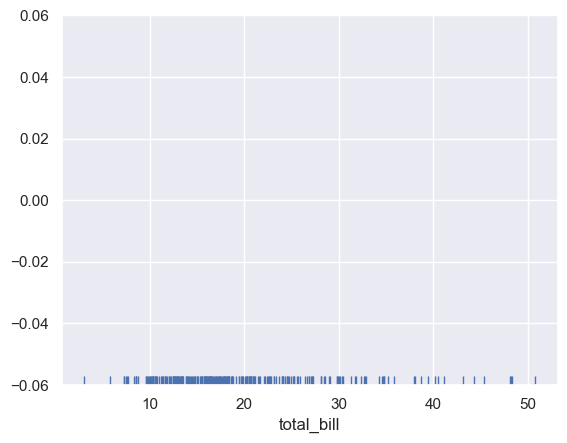

In [54]:
sns.rugplot(a=tips.total_bill)

2.双变量分布 
```
jointplot()
```
参数说明：
```
xlim、ylim: 横、纵轴界限
space: 主画布和分支画布之间的距离（0~1浮点）
marginal_kws：分支画布外观属性
joint_kws：主画布外观属性 , 散点图具备的属性都可以通过字典的方式进行设置
```

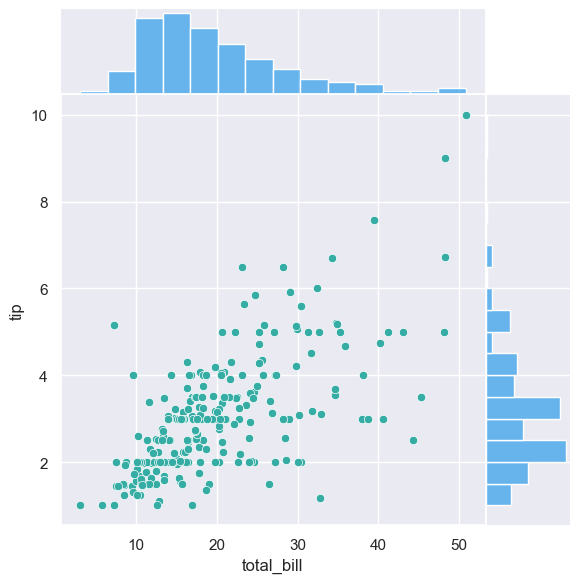

In [55]:
sns.jointplot(x="total_bill", y="tip", data=tips, joint_kws={
    "color":colors[3]
}, marginal_kws={
    "color":colors[4]
}, space=0.01)

3.成对变量分布 
```
pairplot()
```
参数说明：
```
vars、x_vars, y_vars: 要进行显示的列
markers: 分组数据的点型，列表
```

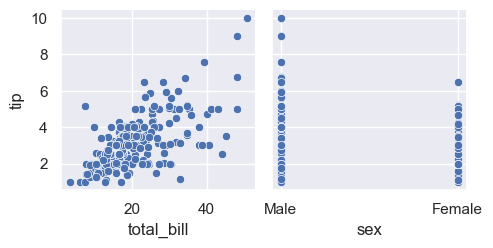

In [56]:
# 只能绘制整个df中的数值型的变量的关系
sns.pairplot(data=tips, diag_kind='kde', x_vars=["total_bill","sex"], y_vars="tip")

### 三、绘制多层面板分类图

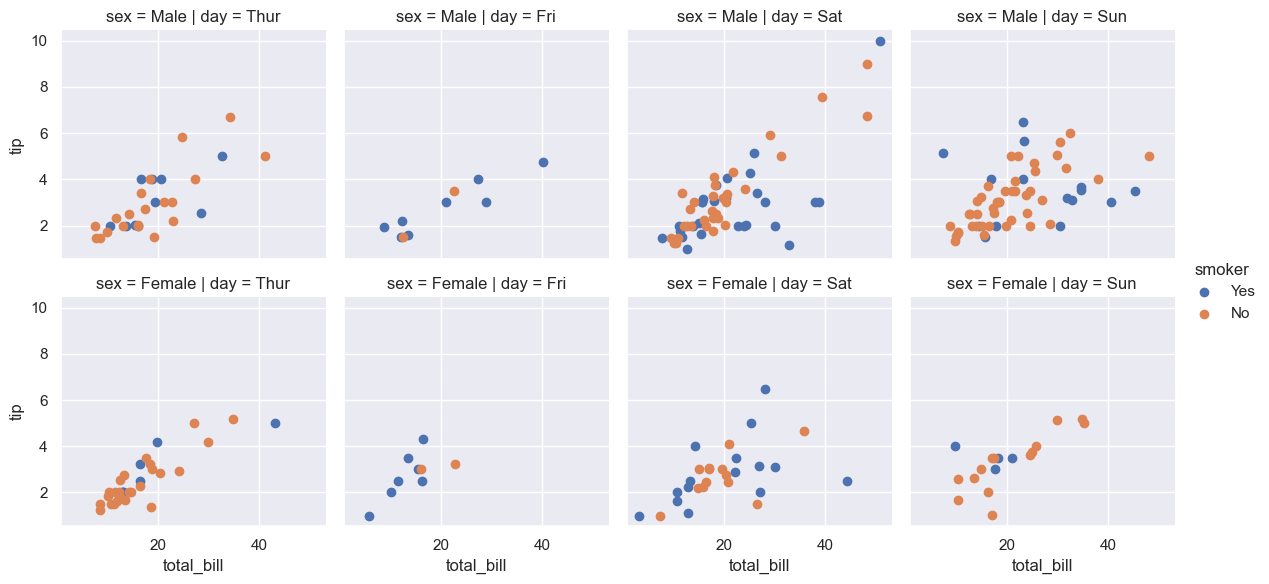

In [57]:
grid = sns.FacetGrid(data=tips, row='sex', col='day', hue='smoker')

grid.map(plt.scatter, "total_bill", "tip").add_legend()
plt.show()

In [58]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [59]:
# 每天不同时间下，男女约会小费的分布

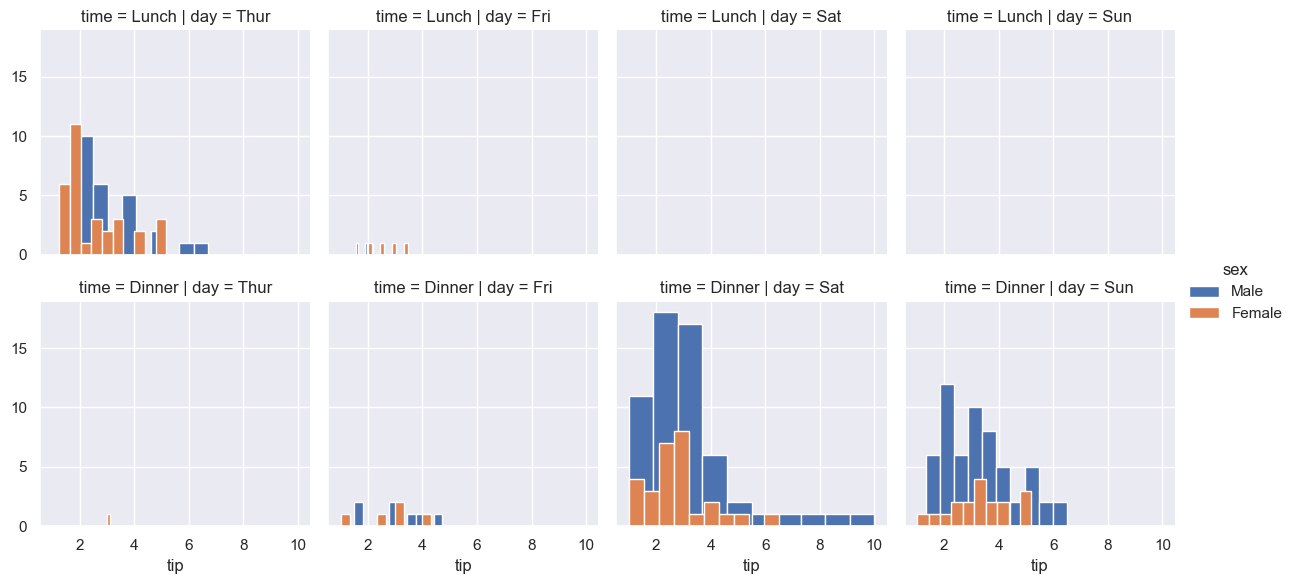

In [60]:
g = sns.FacetGrid(data=tips, row='time', col='day', hue='sex')

g.map(plt.hist, 'tip').add_legend()

factorplot()，可以以更多的子视图展示更多的数据关系

也可以使用FacetGrid()对象

#### 参数说明：
```
x,y,hue 数据集变量 变量名
date 数据集 数据集名
row,col 更多分类变量进行平铺显示 变量名
col_wrap 每行的最高平铺数 整数
estimator 在每个分类中进行矢量到标量的映射 矢量
ci 置信区间 浮点数或None
n_boot 计算置信区间时使用的引导迭代次数 整数
units 采样单元的标识符，用于执行多级引导和重复测量设计 数据变量或向量数据
order, hue_order 对应排序列表 字符串列表
row_order, col_order 对应排序列表 字符串列表
kind : 可选：point 默认, bar 柱形图, count 频次, box 箱体, violin 提琴, strip 散点，swarm 分散点（具体图形参考文章前部的分类介绍）
size 每个面的高度（英寸） 标量
aspect 纵横比 标量
orient 方向 "v"/"h"
color 颜色 matplotlib颜色
palette 调色板 seaborn颜色色板或字典
legend hue的信息面板 True/False
legend_out 是否扩展图形，并将信息框绘制在中心右边 True/False
share{x,y} 共享轴线 True/False
facet_kws FacetGrid的其他参数 字典
```

绘图元素的基本设置  matplotlib

画板风格 seaborn
颜色  seaborn

分组、聚合数据展示 seaborn

groupby + matplotlib 